## Clustering

### Hoca Yolcu sayısı ve uçuş sayısına göre gruplandırılmasını istedi

In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


Regression - R2_score, RMSE 

Classification- Accuracy, Confusion Matix, Precision,Recallve F1 Score Classificaion Report a bakılıyor

Clustering - Silhouette Score bakılıyor

Tüm ML yada Reg. Class. ya Clustering dir.
Hava yarın kaç derece Reg, yarın hava yağar mı Classifion 

Clusterin Amazon para araştırması yapmayan müşterler, en yakın mesafeden ürün nereden gelir, şu binanın altı boşmuş dükkan açayım değil, nereye açılabilir. 

Temel olarak komşuları ile olan ilişkisine bakıyor

In [4]:
df['Published Airline'].nunique()

79

In [5]:
df['Activity Period'].value_counts(),df.shape

(201806    170
 201805    165
 201708    156
 201709    154
 201706    153
          ... 
 201302    110
 201407    109
 201303    108
 200602    108
 201301    107
 Name: Activity Period, Length: 156, dtype: int64,
 (18885, 12))

In [6]:
df['Published Airline'].value_counts()

United Airlines - Pre 07/01/2013    2645
United Airlines                     2004
Alaska Airlines                     1203
Delta Air Lines                      975
American Airlines                    588
                                    ... 
Trego Dugan Aviation                   2
Evergreen International Airlines       2
Atlas Air, Inc                         2
Icelandair EHF                         2
Boeing Company                         1
Name: Published Airline, Length: 79, dtype: int64

In [7]:
df.filter(like='Turkish', axis=0) # Turk havayollarına ait hiç uçuş yok

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count


In [8]:
#df.profile_report()

In [9]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [10]:
# Sütulardaki boşluk olanları _ çizgi ile tamamla, harfleri küçült
df.columns=df.columns.str.lower().str.replace(" ","_")

In [11]:
df.columns

Index(['activity_period', 'operating_airline', 'operating_airline_iata_code',
       'published_airline', 'published_airline_iata_code', 'geo_summary',
       'geo_region', 'activity_type_code', 'price_category_code', 'terminal',
       'boarding_area', 'passenger_count'],
      dtype='object')

In [12]:
df.describe(include=object)

,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area
count,18885,18822,18885,18822,18885,18885,18885,18885,18885,18885
unique,89,82,79,73,2,9,3,2,5,8
top,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,US,Enplaned,Other,International,A
freq,2154,3807,2645,4649,11904,6981,8930,16521,11963,6679


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   activity_period              18885 non-null  int64 
 1   operating_airline            18885 non-null  object
 2   operating_airline_iata_code  18822 non-null  object
 3   published_airline            18885 non-null  object
 4   published_airline_iata_code  18822 non-null  object
 5   geo_summary                  18885 non-null  object
 6   geo_region                   18885 non-null  object
 7   activity_type_code           18885 non-null  object
 8   price_category_code          18885 non-null  object
 9   terminal                     18885 non-null  object
 10  boarding_area                18885 non-null  object
 11  passenger_count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [14]:
df.isnull().sum()

activity_period                 0
operating_airline               0
operating_airline_iata_code    63
published_airline               0
published_airline_iata_code    63
geo_summary                     0
geo_region                      0
activity_type_code              0
price_category_code             0
terminal                        0
boarding_area                   0
passenger_count                 0
dtype: int64

In [15]:
#df[df.columns.str.contains("value")]
#df_value=df.filter(regex='value$',axis=0)
#df_value

In [16]:
df.sample(100)

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count
16147,201612,Frontier Airlines,F9,Frontier Airlines,F9,Domestic,US,Enplaned,Low Fare,Terminal 1,B,24093
6611,201003,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,385230
5612,200907,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,12742
7415,201010,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Deplaned,Low Fare,Terminal 1,B,137622
10161,201210,JetBlue Airways,B6,JetBlue Airways,B6,Domestic,US,Enplaned,Low Fare,International,A,43318
...,...,...,...,...,...,...,...,...,...,...,...,...
2817,200707,Northwest Airlines,NW,Northwest Airlines,NW,Domestic,US,Deplaned,Other,Terminal 1,C,66864
11891,201401,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Low Fare,International,A,2815
16419,201702,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Deplaned,Other,International,A,5518
10132,201210,All Nippon Airways,NH,All Nippon Airways,NH,International,Asia,Deplaned,Other,International,G,6931


In [17]:
df.drop(['operating_airline_iata_code','published_airline_iata_code'],axis=1,inplace=True)

In [18]:
#df['navy_fleet_strengths_value']=df['navy_fleet_strengths_value'].fillna(df.groupby('submarine_fleet_strength')['navy_fleet_strengths_value'].mean())
#df.navy_fleet_strengths_valuet=df.navy_fleet_strengths_value.fillna(value=df.groupby('submarine_fleet_strength')['navy_fleet_strengths_value'].mean())

In [19]:
# ÇALIŞMADI
#df['Period']=pd.to_datetime(df['activity_period'])


In [36]:
# ÇALIŞMADI
#df['year']=df['Period'].dt.year
#df['month']=df['Period'].dt.month

df['Period']= pd.to_datetime(df['activity_period'], format='%Y%m')


In [44]:
df['year'] = df.Period.dt.year
df['month'] =df.Period.dt.month

df.drop('mon',axis=1,inplace=True)

C:\Users\BOLBAHADIR\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

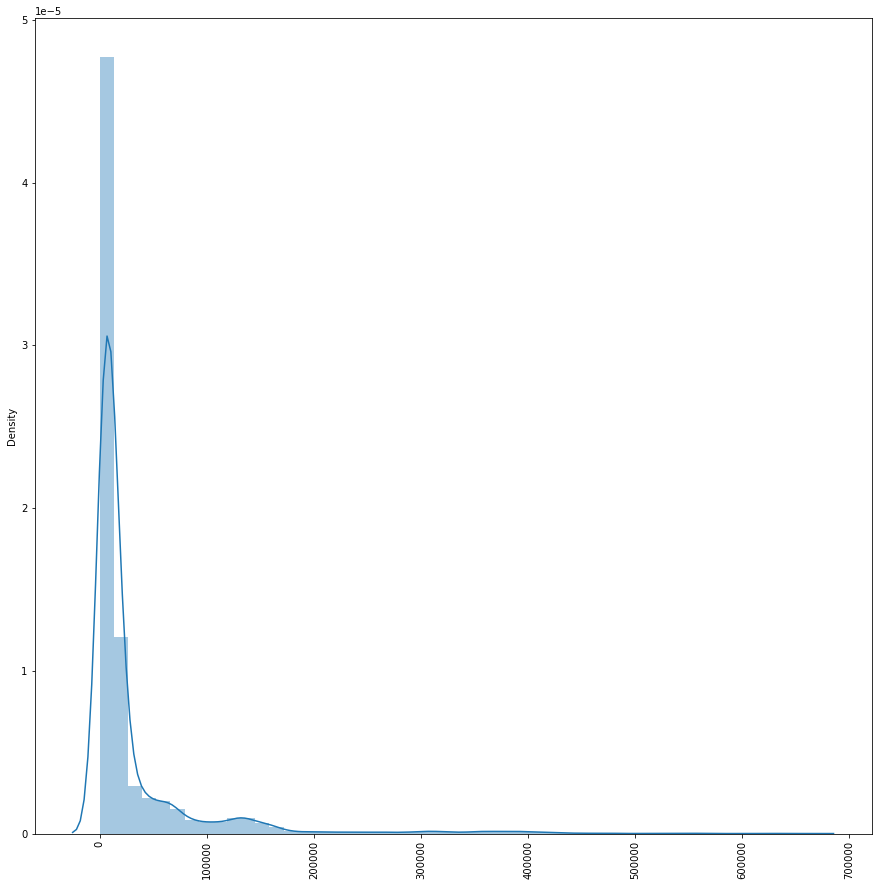

In [45]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.distplot(x=df['passenger_count'])



In [46]:
df

,activity_period,operating_airline,published_airline,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,Period,year,month
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005-07-01,2005,7
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005-07-01,2005,7
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005-07-01,2005,7
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005-07-01,2005,7
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005-07-01,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WOW Air,International,Europe,Enplaned,Other,International,G,50,2018-06-01,2018,6
18881,201806,WestJet Airlines,WestJet Airlines,International,Canada,Deplaned,Other,International,A,10868,2018-06-01,2018,6
18882,201806,WestJet Airlines,WestJet Airlines,International,Canada,Enplaned,Other,International,A,11664,2018-06-01,2018,6
18883,201806,XL Airways France,XL Airways France,International,Europe,Deplaned,Other,International,A,804,2018-06-01,2018,6


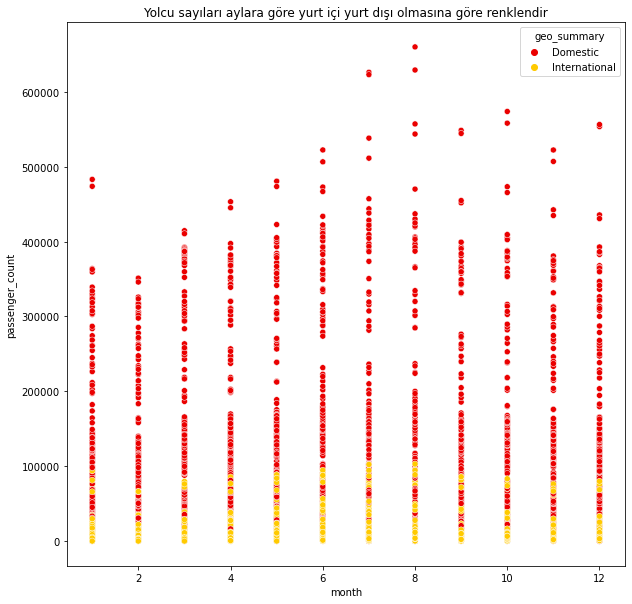

In [47]:
plt.figure(figsize=(10,10))
plt.title('Yolcu sayıları aylara göre yurt içi yurt dışı olmasına göre renklendir')
ax=sns.scatterplot(x='month',y='passenger_count',hue='geo_summary',data=df,palette='hot')

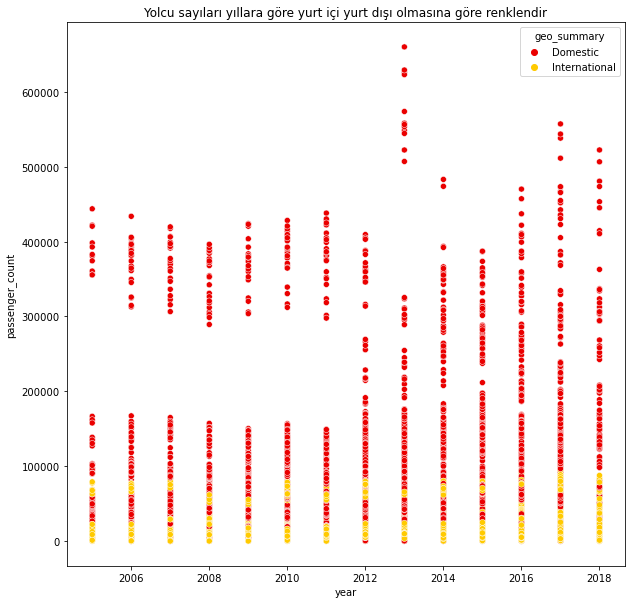

In [48]:
plt.figure(figsize=(10,10))
plt.title('Yolcu sayıları yıllara göre yurt içi yurt dışı olmasına göre renklendir')
ax=sns.scatterplot(x='year',y='passenger_count',hue='geo_summary',data=df,palette='hot')

In [24]:
#with pd.option_context('display.max_columns', None):
   # display(df[df["total_coastline_coverage"].isna()])

,country,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet,trainer_aircraft_fleet_value,helicopter_fleet_strength,helicopter_fleet_strength_value,attack_helicopter_fleet_strength,attack_helicopter_fleet_strength_value,tank_strength,tank_strength_value,afv/apc_strength,afv/apc_strength_value,self-propelled_artillery_strength,self-propelled_artillery_strength_value,towed_artillery_strength,towed_artillery_strength_value,rocket_projector_strength,rocket_projector_strength_value,navy_fleet_strengths,navy_fleet_strengths_value,aircraft_carrier_fleet_strength,aircraft_carrier_fleet_strength_value,submarine_fleet_strength,submarine_fleet_strength_value,destroyer_fleet_strength,destroyer_fleet_strength_value,frigate_fleet_strength,frigate_fleet_strength_value,defense_spending_budget,defense_spending_budget_value,external_debt,external_debt_value,airport_totals,airport_totals_value,oil_production,oil_production_value,oil_consumption,oil_consumption_value,proven_oil_reserves,proven_oil_reserves_value,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
5,Armenia,2.1251,Armenia,64.0,Armenia,0.0,Armenia,9.0,Armenia,3.0,Armenia,13.0,Armenia,37.0,Armenia,20.0,Armenia,110.0,Armenia,748.0,Armenia,38.0,Armenia,150.0,Armenia,68.0,Armenia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armenia,"1,38,50,00,000",Armenia,"10,41,00,00,000",Armenia,11.0,Armenia,0.0,Armenia,47500.0,Armenia,0.0,Armenia,"16,96,085",Armenia,"30,38,217",Armenia,29743.0,NaN,NaN,Armenia,0.0,Armenia,1570.0
7,Austria,0.9568,Austria,120.0,Austria,15.0,Austria,0.0,Austria,11.0,Austria,32.0,Austria,62.0,Austria,0.0,Austria,56.0,Austria,467.0,Austria,33.0,Austria,0.0,Austria,0.0,Austria,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria,"3,38,00,00,000",Austria,"6,30,80,00,00,000",Austria,52.0,Austria,14260.0,Austria,"2,15,000",Austria,"4,30,00,000",Austria,"40,17,691",Austria,"87,93,370",Austria,83871.0,NaN,NaN,Austria,0.0,Austria,2524.0
11,Belarus,0.8179,Belarus,202.0,Belarus,39.0,Belarus,68.0,Belarus,4.0,Belarus,28.0,Belarus,63.0,Belarus,21.0,Belarus,532.0,Belarus,1560.0,Belarus,482.0,Belarus,228.0,Belarus,238.0,Belarus,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belarus,"62,37,02,800",Belarus,"39,92,00,00,000",Belarus,65.0,Belarus,32000.0,Belarus,"1,90,000",Belarus,"19,80,00,000",Belarus,"49,82,905",Belarus,"95,27,543",Belarus,"2,07,600",NaN,NaN,Belarus,2500.0,Belarus,3599.0
13,Bhutan,10.1681,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,Bhutan,2.0,Bhutan,0.0,Bhutan,0.0,Bhutan,27.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,Bhutan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bhutan,"2,51,20,000",Bhutan,"2,67,10,00,000",Bhutan,2.0,Bhutan,0.0,Bhutan,2000.0,Bhutan,0.0,Bhutan,"1,76,808",Bhutan,"7,66,397",Bhutan,38394.0,NaN,NaN,Bhutan,0.0,Bhutan,1136.0
14,Bolivia,0.9942,Bolivia,69.0,Bolivia,0.0,Bolivia,0.0,Bolivia,14.0,Bolivia,23.0,Bolivia,38.0,Bolivia,0.0,Bolivia,54.0,Bolivia,137.0,Bolivia,0.0,Bolivia,86.0,Bolivia,0.0,Bolivia,173.0,Bolivia,0.0,Bolivia,0.0,Bolivia,0.0,Bolivia,0.0,Bolivia,"66,00,00,000",Bolivia,"12,81,00,00,000",Bolivia,855.0,Bolivia,59330.0,Bolivia,60000.0,Bolivia,"21,15,00,000",Bolivia,"50,75,416",Bolivia,"1,13,06,341",Bolivia,"10,98,581",NaN,NaN,Bolivia,10000.0,Bolivia,7252.0
16,Botswana,2.0582,Botswana,45.0,Botswana,10.0,Botswana,0.0,Botswana,11.0,Botswana,8.0,Botswana,16.0,Botswana,0.0,Botswana,55.0,Botswana,245.0,Botswana,0.0,Botswana,30.0,Botswana,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Botswana,"45,00,00,000",Botswana,"2,18,70,00,000",Botswana,74.0,Botswana,0.0,Botswana,16500.0,Botswana,0.0,Botswana,"9,62,617",Botsw

In [25]:
'''

# Any of Nan value country has no seaside. so value assign as 0 
df_value.loc[df_value['total_coastline_coverage_value'].isnull(), 'total_coastline_coverage_value']  = 0
df_value.loc[df_value['navy_fleet_strengths_value'].isnull(), 'navy_fleet_strengths_value']  = 0
df_value.loc[df_value['aircraft_carrier_fleet_strength_value'].isnull(), 'aircraft_carrier_fleet_strength_value']  = 0
df_value.loc[df_value['submarine_fleet_strength_value'].isnull(), 'submarine_fleet_strength_value']  = 0
df_value.loc[df_value['destroyer_fleet_strength_value'].isnull(), 'destroyer_fleet_strength_value']  = 0
df_value.loc[df_value['frigate_fleet_strength_value'].isnull(), 'frigate_fleet_strength_value']  = 0
df_value.loc[df_value['total_border_coverage_value'].isnull(), 'total_border_coverage_value']  = 0
'''

In [50]:
df.select_dtypes("object")

,operating_airline,published_airline,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area
0,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B
1,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B
2,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B
3,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B
4,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B
...,...,...,...,...,...,...,...,...
18880,WOW Air,WOW Air,International,Europe,Enplaned,Other,International,G
18881,WestJet Airlines,WestJet Airlines,International,Canada,Deplaned,Other,International,A
18882,WestJet Airlines,WestJet Airlines,International,Canada,Enplaned,Other,International,A
18883,XL Airways France,XL Airways France,International,Europe,Deplaned,Other,International,A


In [29]:
#s = df_value.select_dtypes(include='object').columns
#df_value[s] = df_value[s].astype("float")
#df_value[s].convert_objects(convert_numeric=True)
#d_value[s]= df_value[s].replace(',','')
#df_value = df_value.apply(pd.to_numeric, errors='coerce', downcast='float') # bu olmadı tüm , değerleri Nan eşitletdi

In [30]:
'''
def replacee(s):
    i=str(s).find(',')
if(i>0):
    return s[:i] + '.' + s[i+1:]
else :
     return s 
     
'''     

"\ndef replacee(s):\n    i=str(s).find(',')\nif(i>0):\n    return s[:i] + '.' + s[i+1:]\nelse :\n     return s \n     \n"

In [53]:
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   activity_period      18885 non-null  int64         
 1   operating_airline    18885 non-null  object        
 2   published_airline    18885 non-null  object        
 3   geo_summary          18885 non-null  object        
 4   geo_region           18885 non-null  object        
 5   activity_type_code   18885 non-null  object        
 6   price_category_code  18885 non-null  object        
 7   terminal             18885 non-null  object        
 8   boarding_area        18885 non-null  object        
 9   passenger_count      18885 non-null  int64         
 10  Period               18885 non-null  datetime64[ns]
 11  year                 18885 non-null  int64         
 12  month                18885 non-null  int64         
dtypes: datetime64[ns](1), int64(4),

(None,
 activity_period        0
 operating_airline      0
 published_airline      0
 geo_summary            0
 geo_region             0
 activity_type_code     0
 price_category_code    0
 terminal               0
 boarding_area          0
 passenger_count        0
 Period                 0
 year                   0
 month                  0
 dtype: int64)

In [55]:
'''
with pd.option_context('display.max_rows',138 ,'display.max_columns', None): 
    display(df_value)
'''

"\nwith pd.option_context('display.max_rows',138 ,'display.max_columns', None): \n    display(df_value)\n"

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [57]:
import matplotlib.pyplot as plt

In [58]:
df.columns

Index(['activity_period', 'operating_airline', 'published_airline',
       'geo_summary', 'geo_region', 'activity_type_code',
       'price_category_code', 'terminal', 'boarding_area', 'passenger_count',
       'Period', 'year', 'month'],
      dtype='object')

In [59]:
x=df[['passenger_count','published_airline',]]

In [60]:
x.head()

,passenger_count,published_airline
0,27271,ATA Airlines
1,29131,ATA Airlines
2,5415,ATA Airlines
3,35156,Air Canada
4,34090,Air Canada


In [61]:
x=pd.get_dummies(x,drop_first=True)

In [62]:
with pd.option_context('display.max_columns', None): 
    display(x)

,passenger_count,published_airline_ATA Airlines,published_airline_Aer Lingus,published_airline_Aeromexico,published_airline_Air Berlin,published_airline_Air Canada,published_airline_Air China,published_airline_Air France,published_airline_Air India Limited,published_airline_Air New Zealand,published_airline_Air Pacific Limited dba Fiji Airways,published_airline_AirTran Airways,published_airline_Alaska Airlines,published_airline_All Nippon Airways,published_airline_Allegiant Air,published_airline_American Airlines,published_airline_Ameriflight,published_airline_Asiana Airlines,"published_airline_Atlas Air, Inc",published_airline_BelAir Airlines,published_airline_Boeing Company,published_airline_British Airways,"published_airline_COPA Airlines, Inc.",published_airline_Cathay Pacific,published_airline_China Airlines,published_airline_China Eastern,published_airline_China Southern,published_airline_Delta Air Lines,published_airline_EVA Airways,published_airline_Emirates,published_airline_Etihad Airways,published_airline_Evergreen International Airlines,published_airline_Finnair,published_airline_French Bee,published_airline_Frontier Airlines,published_airline_Hawaiian Airlines,published_airline_Hong Kong Airlines Limited,published_airline_Iberia,published_airline_Icelandair,published_airline_Icelandair EHF,published_airline_Independence Air,published_airline_Japan Airlines,published_airline_Jet Airways,published_airline_JetBlue Airways,published_airline_KLM Royal Dutch Airlines,published_airline_Korean Air Lines,published_airline_LAN Peru,published_airline_Lufthansa German Airlines,published_airline_Mexicana Airlines,published_airline_Miami Air International,published_airline_Midwest Airlines,published_airline_Northwest Airlines,published_airline_Pacific Aviation,published_airline_Philippine Airlines,published_airline_Qantas Airways,published_airline_Republic Airlines,published_airline_SAS Airlines,published_airline_Servisair,published_airline_Singapore Airlines,published_airline_Southwest Airlines,published_airline_Spirit Airlines,published_airline_Sun Country Airlines,published_airline_Swiss International,published_airline_Swissport USA,published_airline_TACA,published_airline_Thomas Cook Airlines,published_airline_Trego Dugan Aviation,published_airline_Turkish Airlines,published_airline_US Airways,published_airline_United Airlines,published_airline_United Airlines - Pre 07/01/2013,published_airline_Virgin America,published_airline_Virgin Atlantic,published_airline_Volaris Airlines,published_airline_WOW Air,published_airline_WestJet Airlines,published_airline_World Airways,published_airline_XL Airways France,published_airline_Xtra Airways
0,27271,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29131,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5415,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35156,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,34090,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18881,10868

In [63]:
x.columns

Index(['passenger_count', 'published_airline_ATA Airlines',
       'published_airline_Aer Lingus', 'published_airline_Aeromexico',
       'published_airline_Air Berlin', 'published_airline_Air Canada',
       'published_airline_Air China', 'published_airline_Air France',
       'published_airline_Air India Limited',
       'published_airline_Air New Zealand',
       'published_airline_Air Pacific Limited dba Fiji Airways',
       'published_airline_AirTran Airways',
       'published_airline_Alaska Airlines',
       'published_airline_All Nippon Airways',
       'published_airline_Allegiant Air',
       'published_airline_American Airlines', 'published_airline_Ameriflight',
       'published_airline_Asiana Airlines', 'published_airline_Atlas Air, Inc',
       'published_airline_BelAir Airlines', 'published_airline_Boeing Company',
       'published_airline_British Airways',
       'published_airline_COPA Airlines, Inc.',
       'published_airline_Cathay Pacific', 'published_airline_Chi

In [64]:
model=KMeans(n_clusters=7) # veriyi 7 kümeye ayır demek 

In [65]:
model=model.fit(x) # burada fark ettiysen y yok. yani sonuç tahmin etmiyor sadece kümeleme

In [66]:
tahmin=model.predict(x)

In [67]:
tahmin

array([0, 0, 2, ..., 2, 2, 2])

In [68]:
x['cluster']=tahmin

In [69]:
x.head()

,passenger_count,published_airline_ATA Airlines,published_airline_Aer Lingus,published_airline_Aeromexico,published_airline_Air Berlin,published_airline_Air Canada,published_airline_Air China,published_airline_Air France,published_airline_Air India Limited,published_airline_Air New Zealand,...,published_airline_United Airlines - Pre 07/01/2013,published_airline_Virgin America,published_airline_Virgin Atlantic,published_airline_Volaris Airlines,published_airline_WOW Air,published_airline_WestJet Airlines,published_airline_World Airways,published_airline_XL Airways France,published_airline_Xtra Airways,cluster
0,27271,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29131,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5415,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,35156,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34090,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
x['cluster'].unique()

array([0, 2, 3, 4, 6, 1, 5])

In [71]:
silhouette_score(x,tahmin) #

0.6619362197549795

Dört grupda olacağına nasıl karar verdik?

4 gruba ayrıldı. her grubun bir centroid i var. Bu o grubun merkezin diğerine olan uzaklığı gibi düşünebiliriz

Elbow methodu - Dirsek Metodu

Clustering kaç grup var. Grup sayısını artırıyor silhoutte score a bakıyor. Score un azaldığı yerden cluster no u o verebilirsin anlamında. Dirsek nereden kırılırsa o kadar gruba ayırman gerekir.

In [72]:
'''
# Fonksiyon yarım kaldığı için sildik. Tam fonskiyonu aşağıda yazıldı. Elbow kodu.
# Aşağıdaki kod elbow un kırıldığı yere baktık
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print ("Number of cluster{}, silhoette{}".format(no_of_cluster,score))
'''

'\n# Fonksiyon yarım kaldığı için sildik. Tam fonskiyonu aşağıda yazıldı. Elbow kodu.\n# Aşağıdaki kod elbow un kırıldığı yere baktık\ndef clust(clusters):\n    for no_of_cluster in np.arange(1,clusters):\n        no_of_cluster+=1\n        model=KMeans(n_clusters=no_of_cluster)\n        model=model.fit(x)\n        pred=model.predict(x)\n        score=silhouette_score(x,pred)\n        print ("Number of cluster{}, silhoette{}".format(no_of_cluster,score))\n'

In [73]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_


array([0, 0, 2, ..., 2, 2, 2])

<AxesSubplot:>

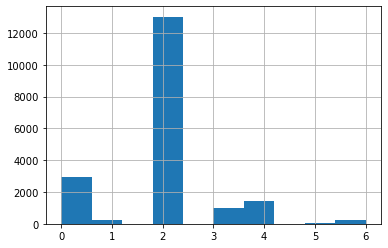

In [99]:
x.cluster.hist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


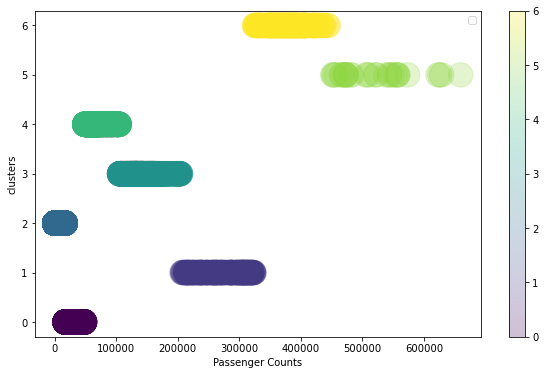

In [102]:

plt.figure(figsize=(10,6))
plt.scatter(x.passenger_count,x.cluster,c=tahmin,s=600,alpha=0.25)
plt.legend()

plt.xlabel('Passenger Counts')
plt.ylabel('clusters')
plt.colorbar()
plt.show()


In [89]:
import numpy as np

ELBOW - Silouhette scrone azaldığı yer clustering in sayısı olarak belirlenir
En yakın komşu : benzerlikleri buluyor 
ELBOW METHOD kodu aşağıda yazıldı

In [90]:
# ELBOW KODU
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters): # 1 den cluster sayısına kadar sayı üret. bunu en alt satırda 9 olarak belirledik
        no_of_cluster+=1 # 1 den başladı her döngü 1 tane artırması için bu yazıldı
        model=KMeans(n_clusters = no_of_cluster) # KMeans modelini çağırdı. Her cluster sayısına göre hesap yapıyor
        model=model.fit(x) # fit diyor 2 için 3,4,5,6,7,8,9 için yapıtor
        pred=model.fit_predict(x) #
        sum_of_squared_distances.append(model.inertia_) # uzaklıkları hesaplıyor
        score = silhouette_score(x,pred) # silhoutte score hesaplıyor
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))# sonuçları yazdırıyor
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)
# düşme nerede başlıyorsa ideal olan düşmeden önceki cluster sayısıdır. 

Number of cluster 2,silhouette0.8596461992613068
Number of cluster 3,silhouette0.8285981422929134
Number of cluster 4,silhouette0.7861526619712333
Number of cluster 5,silhouette0.7846348275541389
Number of cluster 6,silhouette0.6614344017231287
Number of cluster 7,silhouette0.6619362197549795
Number of cluster 8,silhouette0.6454079073725595
Number of cluster 9,silhouette0.6405685782458413


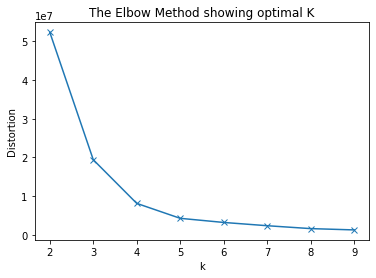

In [58]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() 


<AxesSubplot:ylabel='Count'>

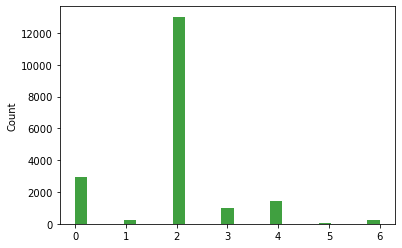

In [91]:
sns.histplot(tahmin, bins=25,color='green',edgecolor=None)